DS5002, Python Project
PJ Grant
Dec 9th, 2024

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import CSVs and convert each to a dataframe
cost_of_living = pd.read_csv('cost_of_living.csv')
ds_salaries = pd.read_csv('ds_salaries.csv')
levelsfyi_salaries = pd.read_csv('Levels_Fyi_Salary_Data.csv')
continents = pd.read_csv('Continents2.csv')
country_codes = pd.read_excel('country_codes.xlsx')
languages = pd.read_csv('languages-by-country-2024.csv')
temperature = pd.read_csv('temperature_data.csv')

This section addresses the assignment prompt to identify the top 5 global locations where a data scientist's salary goes the furthest relative to the following cost indices: Cost of Living, Cost of Living Plus Rent, Rent, Groceries, Restaurants, and Purchasing Power.

Code Objective: Create a new data frame called cost data, split the city and the country columns and join the relevant salary information needed to begin the analysis. Filtering the Data Scientist salary observations for remote roles only (100 remote ratio) allows me to ignore salary differences within a country (e.g. NY salaries are typically higher than Mississippi for equivalent roles). I've downloaded another data set from Kaggle called 'continents2', which contains the continent for each country and the country codes, as I'll be using the continent field later in my analysis. Source: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region?resource=download 

In [3]:
#Create a new data frame called cost data 
cost_data = cost_of_living.copy()

#Split the city and the country columns
cost_data['Country'] = cost_data['City'].str.split(',').str[-1].str.strip()
cost_data['City'] = cost_data['City'].str.split(',').str[0].str.strip()

#Join the continents2 data set to cost data
cost_data = pd.merge(cost_data, continents, left_on = 'Country', right_on = 'name', how = 'left')

#Drop uneeded columns
drop_cols = ['name', 'country-code','iso_3166-2','intermediate-region', 'region-code', 'Rank']
cost_data.drop(columns = drop_cols, inplace = True)

#Create dataframe for analysis later on
country_choice = cost_data.copy()

#Filter ds_salaries for remote data scientist salaries only, and find the average salary by country
data_salaries = ds_salaries[(ds_salaries['job_title'] == 'Data Scientist') & (ds_salaries['remote_ratio'] == 100)]
data_salaries = data_salaries.groupby('employee_residence')['salary_in_usd'].mean().round(1)

#Join data_salaries to cost_data, dropping countries where salaries aren't available
cost_data = pd.merge(cost_data, data_salaries, left_on = 'alpha-2', right_on = 'employee_residence', how = 'inner')
drop_cols = ['alpha-3', 'intermediate-region-code','sub-region-code']
cost_data.drop(columns = drop_cols, inplace = True)

#Rename salary column
cost_data.rename(columns={'salary_in_usd':'salary'}, inplace=True)

Code Objective: The goal is to assess how far a data scientist's salary can stretch in various countries. To achieve this, I will use U.S. salaries as a benchmark to create a salary index. We will then compare each country's salary index with their respective cost indices to evaluate affordability

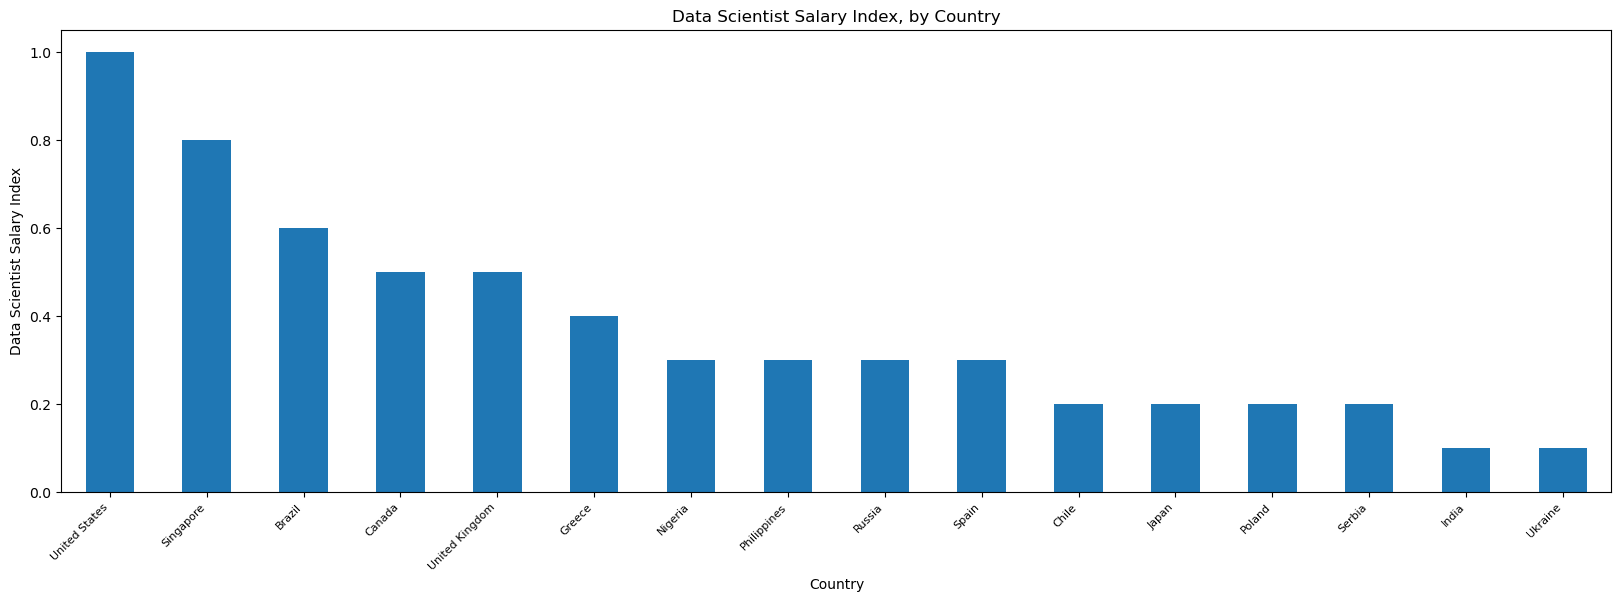

In [4]:
#Find the salary for US which will serve as the denominator to calculate the salary index
us_salary = cost_data[cost_data['Country'] == 'United States']['salary'].unique()[0]

#Calculate the salary index
cost_data['salary_index'] = round(cost_data['salary'] / us_salary,2)

# Compare cost indicies to salary index to find relative affordability scores
cost_data['cost_of_living_score'] = round(cost_data['salary_index'] / cost_data['Cost of Living Index'],4) * 100
cost_data['rent_score'] = round(cost_data['salary_index'] / cost_data['Rent Index'],4) * 100
cost_data['cost_of_living_plus_rent_score'] = round(cost_data['salary_index'] / cost_data['Cost of Living Plus Rent Index'],4) * 100
cost_data['groceries_score'] = round(cost_data['salary_index'] / cost_data['Groceries Index'],4) * 100
cost_data['restaurant_score'] = round(cost_data['salary_index'] / cost_data['Restaurant Price Index'],4) * 100
cost_data['purchasing_score'] = round(cost_data['salary_index'] / cost_data['Local Purchasing Power Index'],4) * 100

#EDA, Create a chart of salary index by country
cost_data.groupby('Country')['salary_index'].mean().round(1).sort_values(ascending = False).plot(kind = 'bar', figsize=(20, 6))
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.xlabel('Country')
plt.ylabel('Data Scientist Salary Index')
plt.title('Data Scientist Salary Index, by Country')
plt.show()

Code Objective: Identify the top 5 cities where a Data Scientist's salary stretches the furthest for each cost index

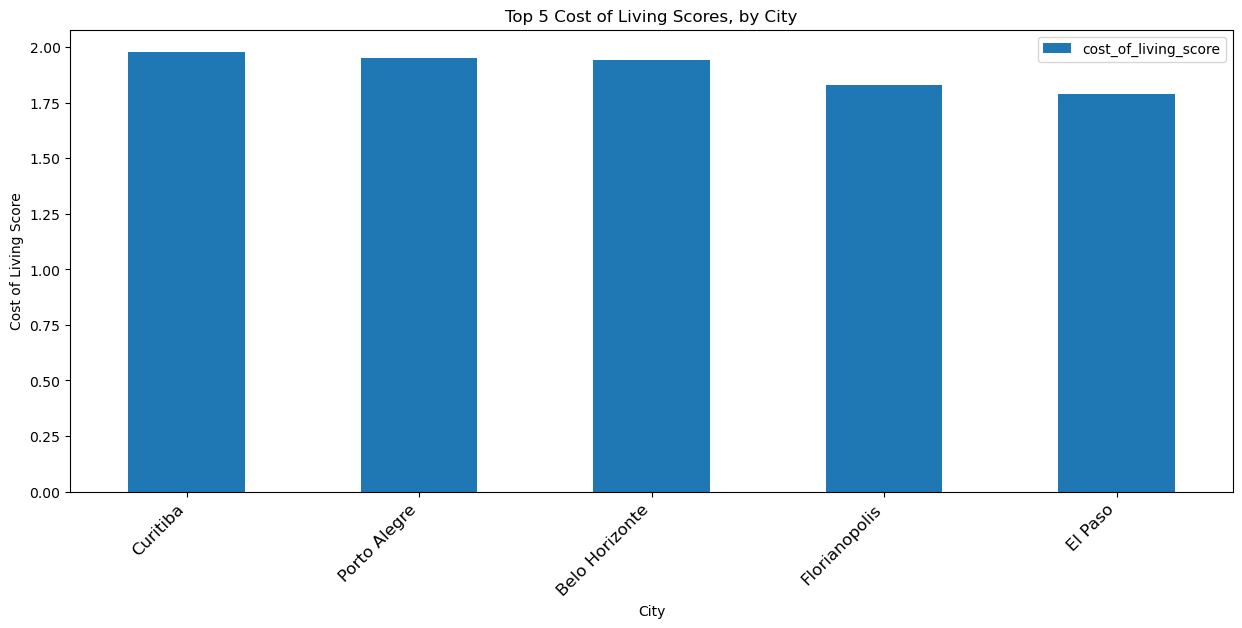

In [18]:
#The cities where your salary goes the furthest relative to the cost of living index are Curitiba, Porto Alegre, Belo Horizonte, Florianopolis (all in Brazil), and El Paso (US)
top_5_cost_of_living = cost_data.sort_values('cost_of_living_score', ascending = False).head(5)
top_5_cost_of_living.plot(x = 'City', y ='cost_of_living_score', kind = 'bar', figsize=(15, 6))
plt.xticks(rotation = 45, ha ='right',fontsize = 12)
plt.xlabel('City')
plt.ylabel('Cost of Living Score')
plt.title('Top 5 Cost of Living Scores, by City')
plt.show()

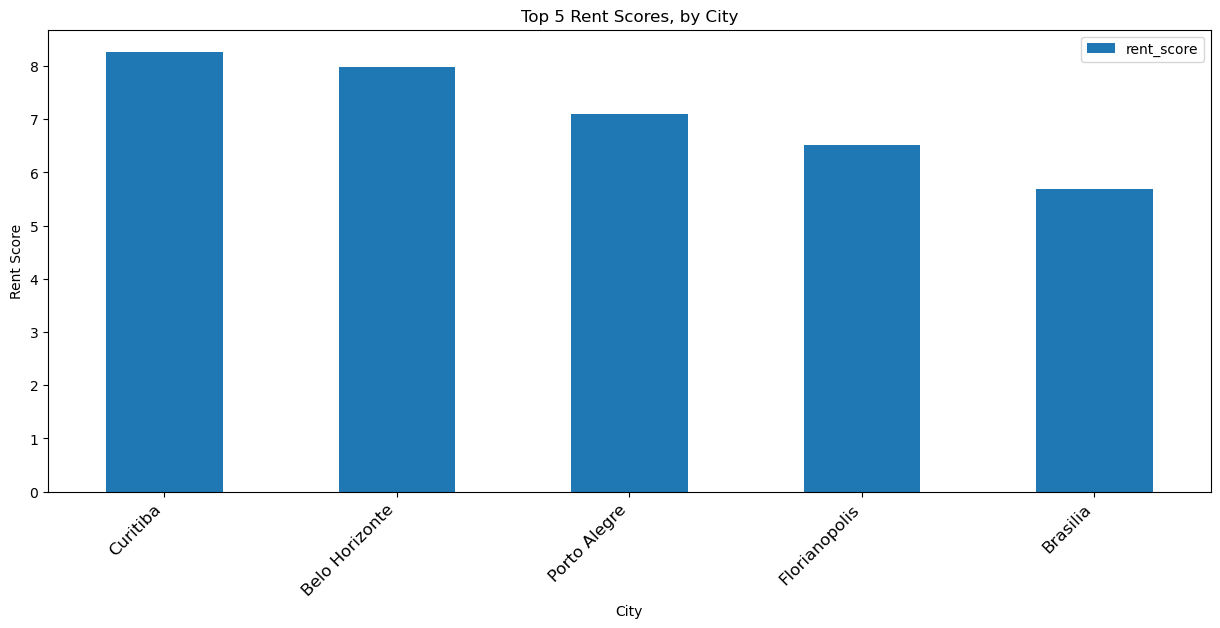

In [17]:
#The cities where your salary goes the furthest relative to the rent index are Curitiba, Belo Horizonte, Porto Alegre, Florianopolis, and Brasilia, all in Brazil
top_5_rent_score = cost_data.sort_values('rent_score', ascending = False).head(5)
top_5_rent_score.plot(x = 'City', y ='rent_score', kind = 'bar', figsize=(15, 6))
plt.xticks(rotation = 45, ha ='right',fontsize = 12)
plt.xlabel('City')
plt.ylabel('Rent Score')
plt.title('Top 5 Rent Scores, by City')
plt.show()

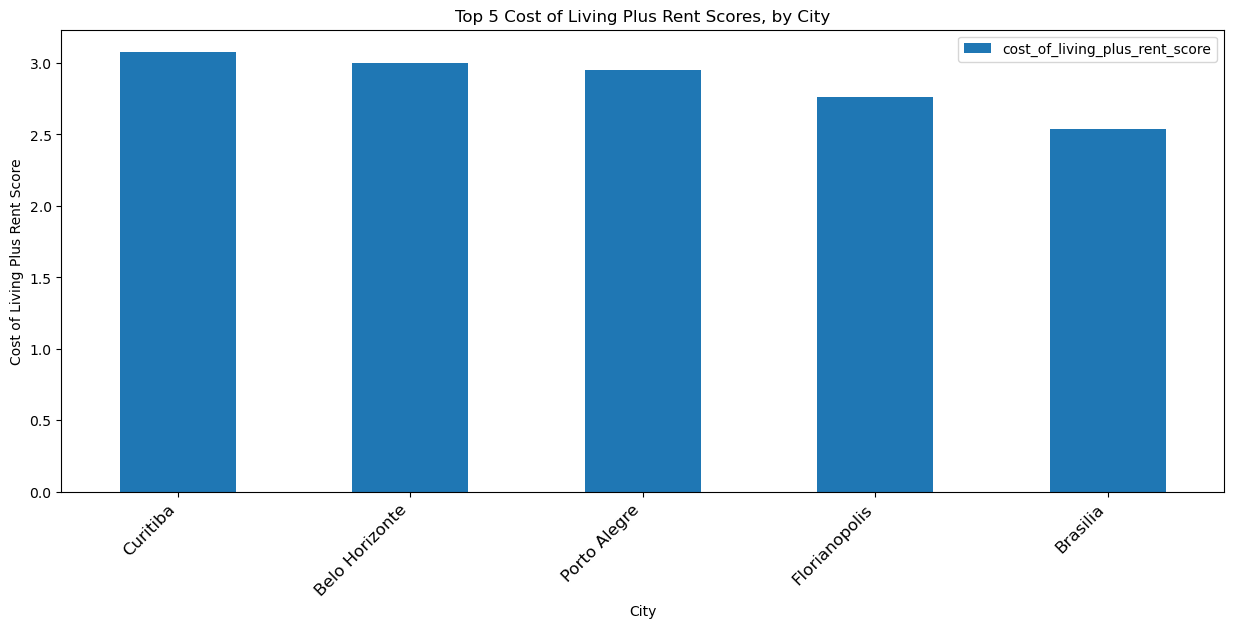

In [19]:
#The cities where your salary goes the furthest relative to the cost of living plus rent index are Curitiba, Belo Horizonte, Porto Alegre, Florianopolis, and Brasilia, all in Brazil
top_5_cost_of_living_plus_rent_score = cost_data.sort_values('cost_of_living_plus_rent_score', ascending = False).head(5)
top_5_cost_of_living_plus_rent_score.plot(x = 'City', y ='cost_of_living_plus_rent_score', kind = 'bar', figsize=(15, 6))
plt.xticks(rotation = 45, ha ='right',fontsize = 12)
plt.xlabel('City')
plt.ylabel('Cost of Living Plus Rent Score')
plt.title('Top 5 Cost of Living Plus Rent Scores, by City')
plt.show()

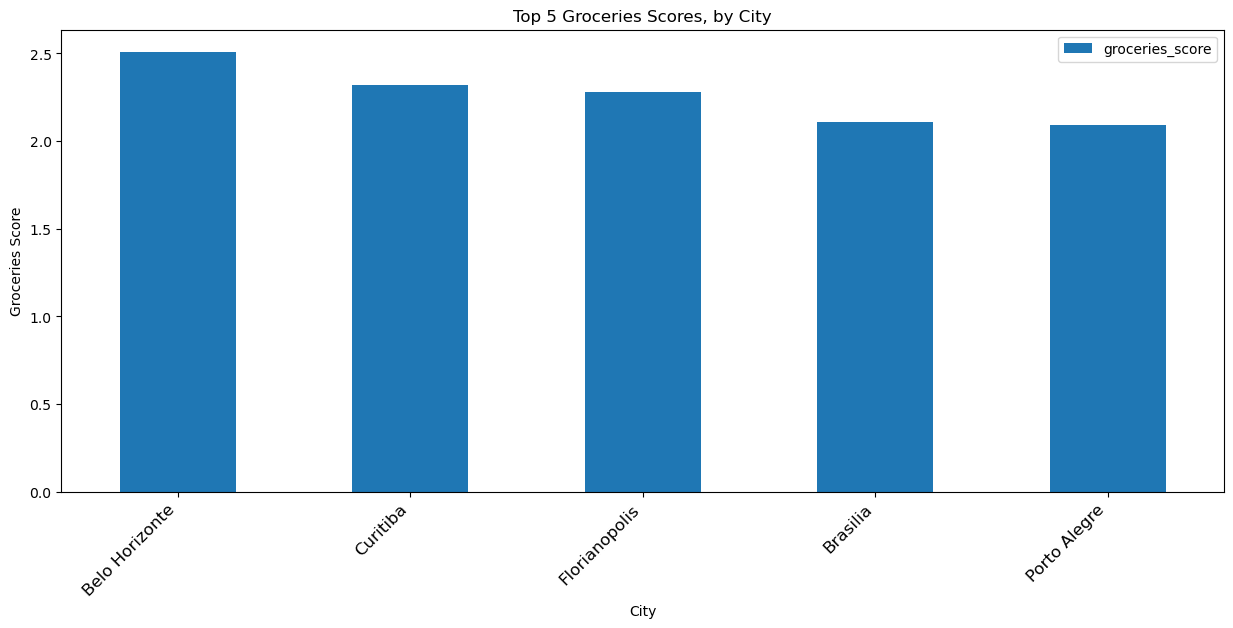

In [8]:
#The cities where your salary goes the furthest when compared to the groceries index are: Belo Horizonte, Brazil; Curitiba, Brazil; Florianopolis, Brazil; Brasilia, Brazil; and Porto Alegre, Brazil 
top_5_groceries_score = cost_data.sort_values('groceries_score', ascending = False).head(5)
top_5_groceries_score.plot(x = 'City', y ='groceries_score', kind = 'bar', figsize=(15, 6))
plt.xticks(rotation = 45, ha ='right',fontsize = 12)
plt.xlabel('City')
plt.ylabel('Groceries Score')
plt.title('Top 5 Groceries Scores, by City')
plt.show()

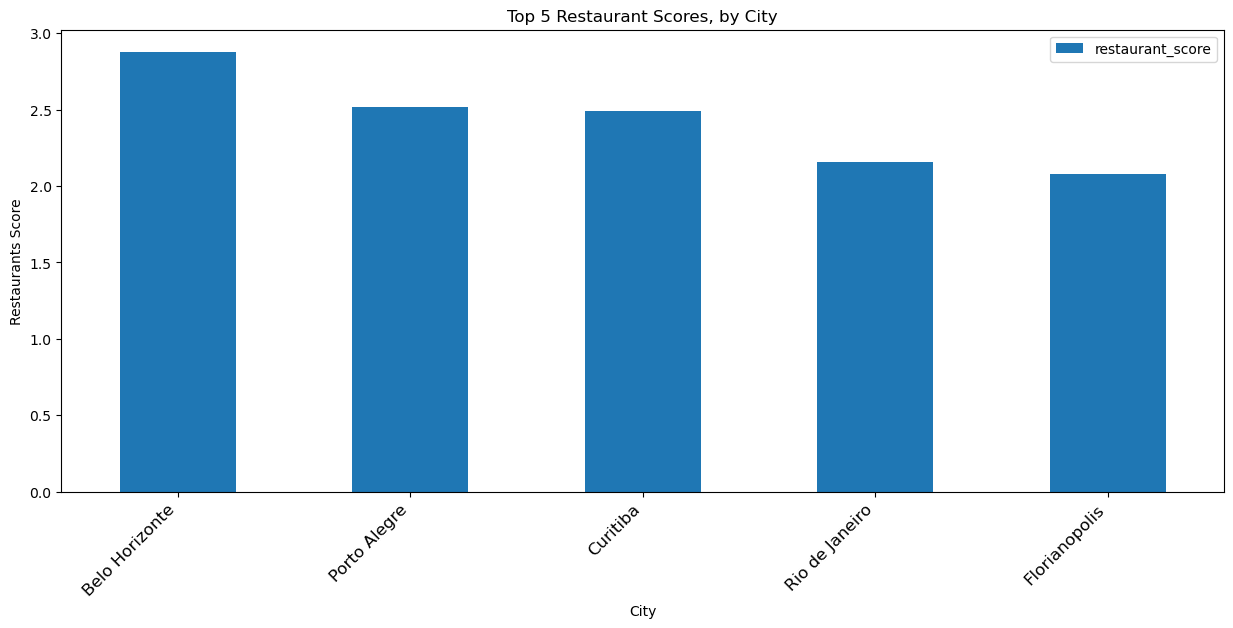

In [20]:
#The cities where your salary goes the furthest relative to the restaurant index are Belo Horizonte, Porto Alegre, Curitiba, Rio de Janeiro and Florianopolis, all in Brazil 
top_5_restaurant_score = cost_data.sort_values('restaurant_score', ascending = False).head(5)
top_5_restaurant_score.plot(x = 'City', y ='restaurant_score', kind = 'bar', figsize=(15, 6))
plt.xticks(rotation = 45, ha ='right',fontsize = 12)
plt.xlabel('City')
plt.ylabel('Restaurants Score')
plt.title('Top 5 Restaurant Scores, by City')
plt.show()

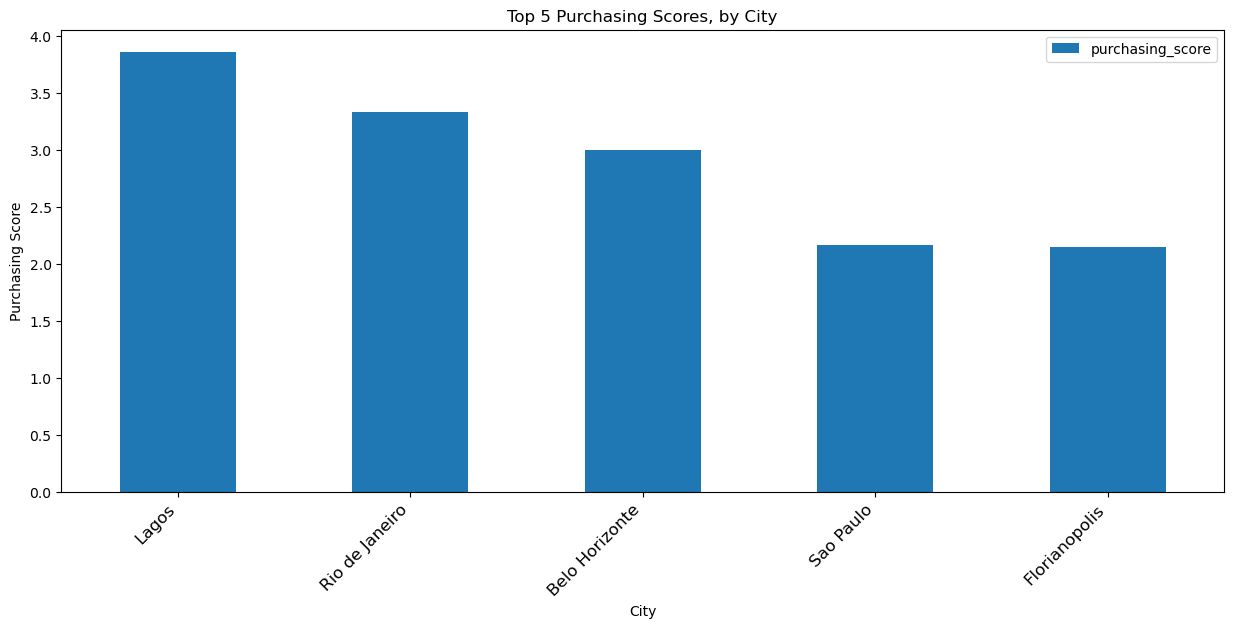

In [21]:
#The cities where your salary goes the furthest relative to the purchasing power index are Lagos (Nigeria), Rio de Janeiro,  Belo Horizonte, Sao Paulo, and Florianopolis (all in Brazil)  
top_5_purchasing_score = cost_data.sort_values('purchasing_score', ascending = False).head(5)
top_5_purchasing_score.plot(x = 'City', y ='purchasing_score', kind = 'bar', figsize=(15, 6))
plt.xticks(rotation = 45, ha ='right',fontsize = 12)
plt.xlabel('City')
plt.ylabel('Purchasing Score')
plt.title('Top 5 Purchasing Scores, by City')
plt.show()

Code Objective: I will select a city to live in based on warm weather, location in the Americas, an English-speaking population, and a top 10 affordability score. I will focus on the Cost of Living Plus Rent index, which includes expenses like food, shelter, transportation, energy, clothing, healthcare, childcare, and rent. I'll assume that I can work remotely for a US company and be paid the US rate if living in America (salary index of 100), but I'll take a 15% salary reduction if living outside the US (index of 85).
Cost of Living Index Source: https://www.investopedia.com/ask/answers/100214/how-cost-living-index-calculated.asp#:~:text=A%20cost%20of%20living%20index%20compares%20the%20expenses%20from%20one,basic%20expenses%20rise%20over%20time Language Data Source: https://worldpopulationreview.com/country-rankings/languages-by-country Temperature Data Source: https://www.kaggle.com/datasets/bilalwaseer/worlds-cities-with-their-average-temperature

In [22]:
# Clean the languages data frame
english_countries = languages[languages['LanguagesOfficialOrNationalLanguage'].str.contains('English', case = False)].copy()
english_countries.drop(columns = ['LanguagesMinorityLanguage','LanguagesOtherWidelySpokenLanguages'], inplace = True)
english_countries.rename(columns={'LanguagesOfficialOrNationalLanguage':'language'}, inplace=True)

In [12]:
#Join the language data to the country choice data frame
country_choice = pd.merge(country_choice, english_countries, left_on = 'Country', right_on = 'country', how = 'left')

#Subset all countries with English as an official language
country_choice = country_choice[country_choice['language'].str.contains('English', case = False, na = False)]

#Sets the salary index to 100 for US cities and 85 for outside the US
country_choice['salary_index'] = np.where(country_choice['Country'] == 'United States', 100, 85)

#Join the temperature dataframe to the country choice data frame
annual_temp = temperature[['Country', 'City','Year']].copy()
annual_temp['avg_temp'] = annual_temp['Year'].str.split('\n', expand=True)[0]
annual_temp['avg_temp'] = annual_temp['avg_temp'].str.replace('−', '-', regex=False)
annual_temp = annual_temp[['Country', 'City','avg_temp']]
annual_temp['avg_temp'] = annual_temp['avg_temp'].astype(float)
country_mean_temp = annual_temp.groupby('Country')['avg_temp'].mean().round(2)
country_mean_temp = country_mean_temp.reset_index()
country_choice = pd.merge(country_choice, country_mean_temp, left_on = 'country', right_on = 'Country', how = 'left')

In [13]:
#Calculate Affordability Index
country_choice['affordability_index'] = round(country_choice['salary_index'] / country_choice['Cost of Living Plus Rent Index'],4) * 100

#Select only cities in the Americas
country_choice = country_choice[country_choice['region'] == 'Americas']

#Find the top 10 cities
top_10_choices = country_choice.sort_values('affordability_index', ascending = False).head(10)

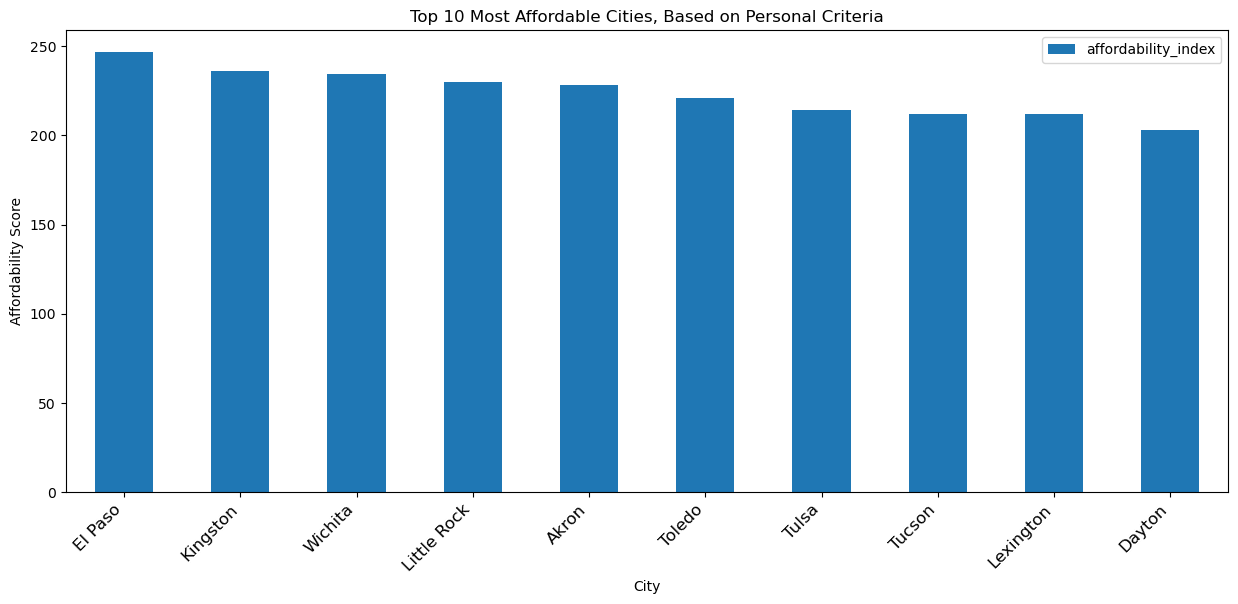

In [14]:
top_10_choices.plot(x = 'City', y ='affordability_index', kind = 'bar', figsize=(15, 6))
plt.xticks(rotation = 45, ha ='right',fontsize = 12)
plt.xlabel('City')
plt.ylabel('Affordability Score')
plt.title('Top 10 Most Affordable Cities, Based on Personal Criteria')
plt.show()

Conclusion: The cities with warm climates Kingston (Jamaica), El Paso, Tulsa, Tucson, and Lexington (All US). My wife said this was cheating, but since I was born in Kingston, Jamaica - I'll go ahead and choose that one :)